In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [6]:
spotify_df = pd.read_csv("../data/Cleaned_Spotify_2024_Global_Streaming_Data.csv")
spotify_df.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2020,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2023,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2019,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2019,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2019,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


In [10]:
# group by genre and calculate the average total streams
avg_streams = spotify_df.groupby('Genre')['Total Streams (Millions)'].mean().sort_values(ascending=False)
avg_streams

Genre
R&B          2779.311707
K-pop        2760.691667
Classical    2739.955417
Pop          2686.797500
Indie        2661.669400
Rock         2558.947069
EDM          2466.699804
Jazz         2408.460000
Reggaeton    2404.313636
Hip Hop      2284.867551
Name: Total Streams (Millions), dtype: float64

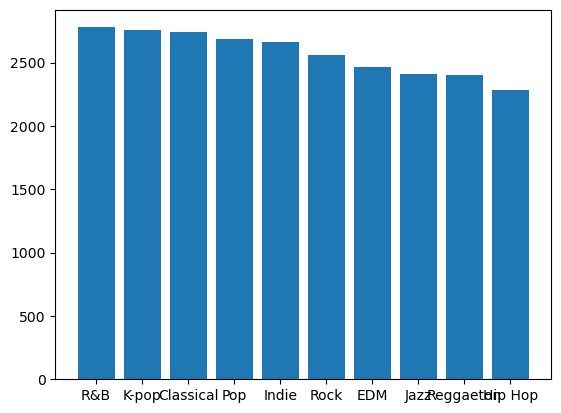

In [13]:
plt.bar(avg_streams.index, avg_streams.values)
plt.show()

In [ ]:
plt.bar(avg_streams.index, avg_streams.values)
plt.title('Average Total Streams by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Total Streams (Millions)')
plt.show()

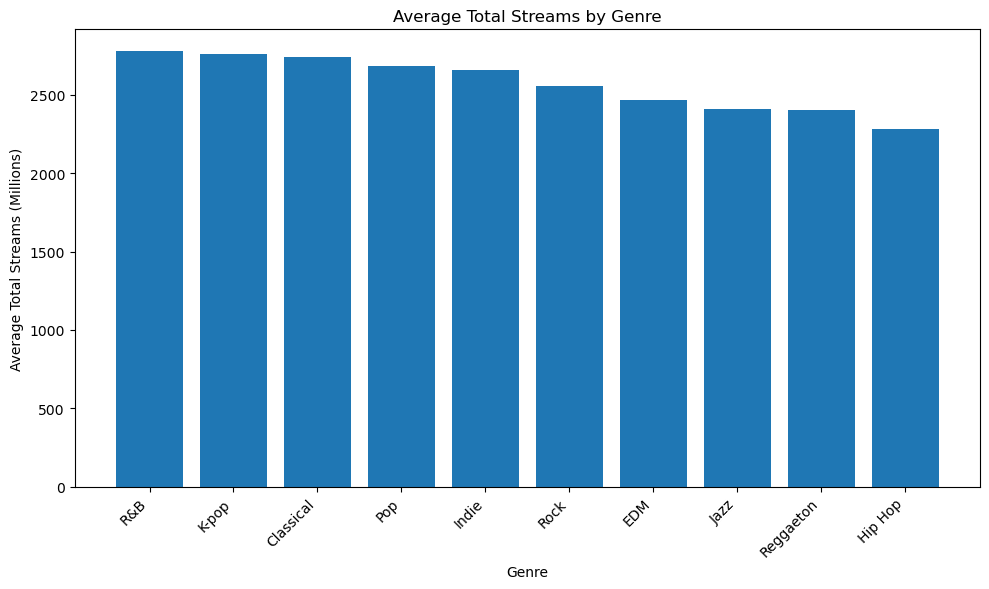

In [16]:
plt.figure(figsize=(10,6))
plt.bar(avg_streams.index, avg_streams.values)
plt.xticks(rotation=45, ha='right')
plt.title('Average Total Streams by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Total Streams (Millions)')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(avg_streams.index, avg_streams.values)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.xticks(rotation=45, ha='right')
plt.title('Average Total Streams by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Total Streams (Millions)')




plt.tight_layout()
plt.show()

In [23]:
avg_artists_streams = spotify_df.groupby("Artist")["Total Streams (Millions)"].mean().sort_values(ascending=False).head(10)
avg_artists_streams

Artist
Dua Lipa         3008.270000
Ariana Grande    2869.031111
BTS              2824.987955
BLACKPINK        2763.213243
Bad Bunny        2655.404000
Billie Eilish    2650.803548
Doja Cat         2649.965588
Drake            2611.255161
The Weeknd       2523.978000
Ed Sheeran       2510.267143
Name: Total Streams (Millions), dtype: float64

Text(0, 0.5, 'Average Total Streams (Millions)')

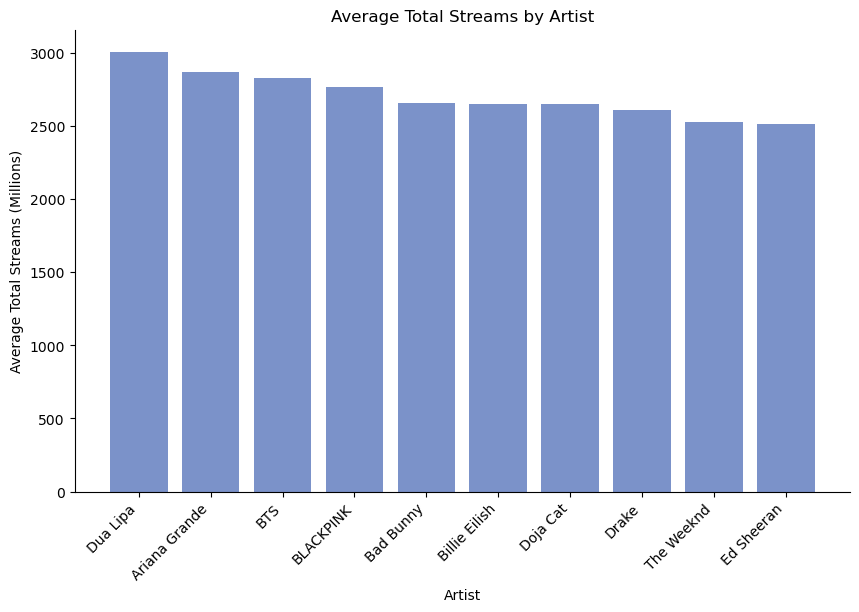

In [ ]:
plt.figure(figsize=(10,6))
colors = ["#7b92c9"]*len(avg_artists_streams)

max_index = avg_artists_streams.idxmax()
highlight_position = avg_artists_streams.index.get_loc(max_index)
colors[highlight_position] = "#55d35b"

plt.bar(avg_artists_streams.index, avg_artists_streams.values, color= colors, width=0.8)



ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.xticks(rotation=45, ha='right')
plt.title('Average Total Streams by Artist')
plt.xlabel('Artist')
plt.ylabel('Average Total Streams (Millions)')



Text(0, 0.5, 'Average Total Streams (Millions)')

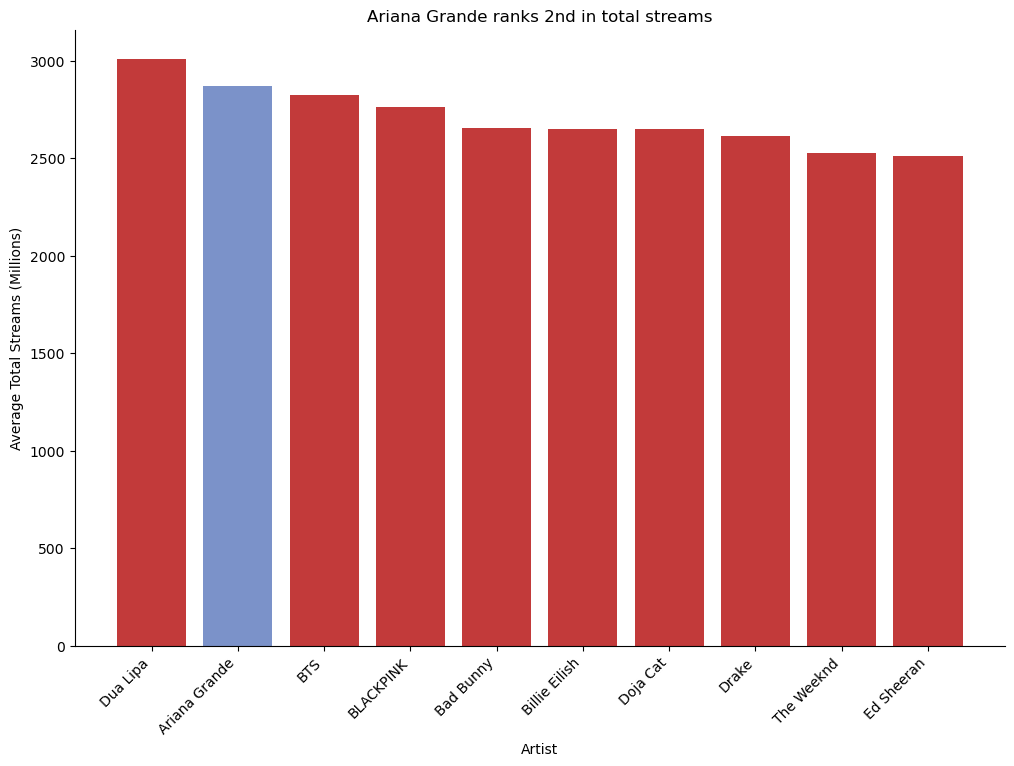

In [28]:
plt.figure(figsize=(12,8))
special_artist = "Ariana Grande"
colors = ["#7b92c9" if artist == special_artist else "#c23a3a" for artist in avg_artists_streams.index]

plt.bar(avg_artists_streams.index, avg_artists_streams.values, color= colors)



ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.xticks(rotation=45, ha='right')
plt.title('Ariana Grande ranks 2nd in total streams')
plt.xlabel('Artist')
plt.ylabel('Average Total Streams (Millions)')



In [29]:
spotify_df.columns
spotify_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

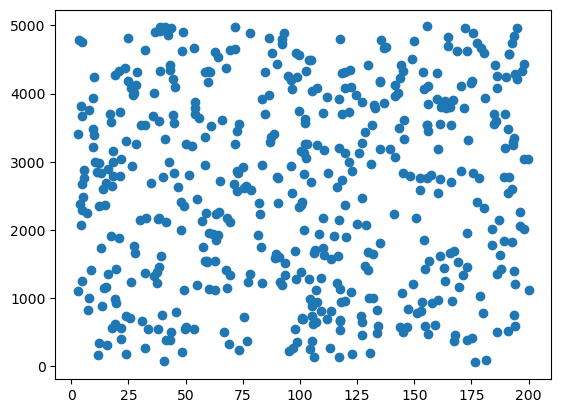

In [30]:
plt.scatter(spotify_df["Streams Last 30 Days (Millions)"], spotify_df["Total Streams (Millions)"])
plt.show()


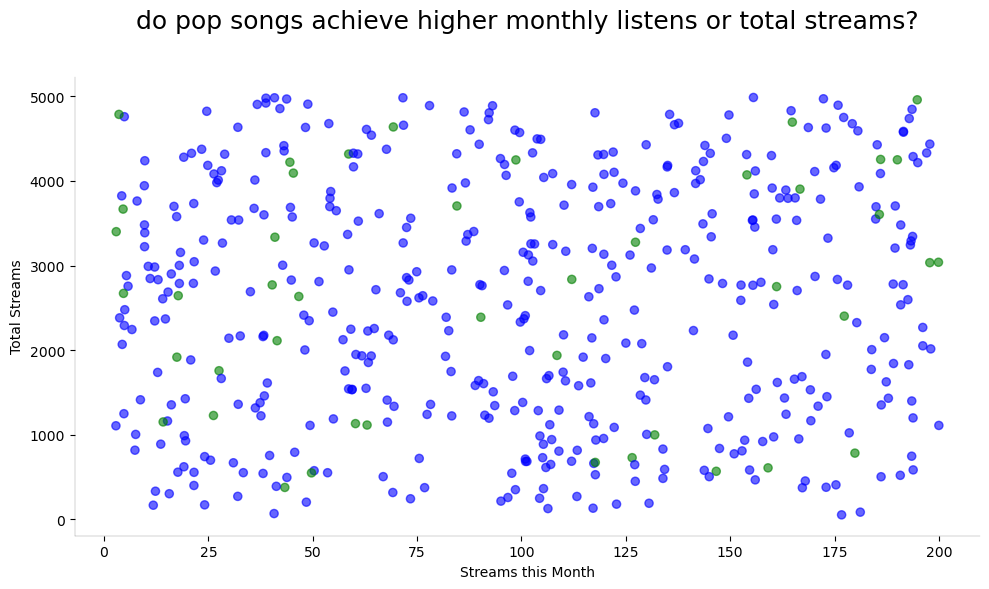

In [37]:
plt.figure(figsize=(10,6))
featured_genre = "Pop"
colors = ["green" if featured_genre == genre else "blue" for genre in spotify_df["Genre"]]

plt.scatter(
    spotify_df["Streams Last 30 Days (Millions)"], 
    spotify_df["Total Streams (Millions)"],
    color = colors,
    alpha = 0.6,
    s=35
)

plt.xlabel('Streams this Month')
plt.ylabel('Total Streams')


ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('do pop songs achieve higher monthly listens or total streams?', fontsize=18, pad=35)

for spine in ax.spines.values():
    spine.set_linewidth(0.25)
    spine.set_alpha(0.5)
    

plt.tight_layout()
plt.show()